Code for cleanning and preparing the entry surveys data

In [36]:
from __future__ import absolute_import, division, print_function
import datetime
import time
import os

import pandas as pd

In [37]:
import sys
sys.path.insert(0, '../../src/data/')

from config import *

# Config

In [38]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

2019-01-18 13:20:44,777 - DEBUG - backend module://ipykernel.pylab.backend_inline version unknown


# read

In [39]:
participants_entry_survey_data_anon = pd.read_hdf(surveys_anon_store_path, 'entry/participants_entry_survey_data_anon')

In [40]:
participants_entry_survey_data_anon.head()

,Q3.3_7_TEXT,Q5.3,Q6.1,Q5.6,Q7.2_10,Q7.2_3,Q7.2_9,Q7.2_2,member,Q7.2_5,...,Q5.5_1_TEXT,Q7.2_8,Q7.2_7,Q7.2_6,Q3.4,Q7.2_4,Q3.2,Q3.3,Q7.2_1,Q3.1
0,NaN,Yes,Hacker (you can solve any technical problem an...,6 months or more,Disagree moderately,Agree strongly,Agree moderately,Agree a little,7EYKW64FHG,Agree moderately,...,Lead researcher,Disagree strongly,Agree moderately,Agree a little,Israel,Disagree moderately,34 - 37,White,Disagree a little,Male
1,NaN,No,Hacker (you can solve any technical problem an...,Less than 1 month,Agree a little,Agree moderately,Agree strongly,Agree a little,O3PUFCVB5K,Agree strongly,...,NaN,Disagree moderately,Agree a little,Agree a little,United States of America,Disagree strongly,18 - 21,White,Agree a little,Male
2,NaN,Yes,Hipster (you are a creative design genius who ...,6 months or more,Disagree strongly,Agree moderately,Agree a little,Agree a little,XN8V5Z8X50,Agree moderately,...,Chief Product Officer,Disagree strongly,Agree moderately,Disagree moderately,United States of America,Disagree moderately,26 - 29,White,Agree moderately,Female
3,NaN,Yes,Hustler (you are the one who closes deals and ...,6 months or more,Disagree a little,Agree a little,Agree strongly,Disagree a little,3ZH34TXI1T,Agree strongly,...,Co-Founder and CEO,Disagree moderately,Agree strongly,Agree a little,"Germany,United States of America",Disagree moderately,26 - 29,White,Neither agree nor disagree,Female
4,NaN,It's complicated (explain),Hipster (you are a creative design genius who ...,1-3 months,Disagree strongly,Agree moderately,Agree strongly,Agree moderately,4OUW6RT5BH,Agree strongly,...,NaN,Disagree strongly,Agree strongly,Disagree moderately,United States of America,Disagree moderately,34 - 37,Asian,Agree moderately,Female


# Rename columns

In [41]:
columns_dict = {
    'member':'member',
    'Q3.3':'race',
    'Q3.3_7_TEXT':'race_other',
    'Q3.2':'age',
    'Q3.1':'gender',
    'Q3.4':'citizneships',
    'Q5.3':'is_cofounder',
    'Q5.5_1_TEXT':'title',
    'Q5.6':'time_in_startup',
    'Q6.1':'HHH_type',
    'Q6.2':'experience',
    'Q7.2_1':'TIPI_1',
    'Q7.2_2':'TIPI_2',
    'Q7.2_3':'TIPI_3',
    'Q7.2_4':'TIPI_4',
    'Q7.2_5':'TIPI_5',
    'Q7.2_6':'TIPI_6',
    'Q7.2_7':'TIPI_7',
    'Q7.2_8':'TIPI_8',
    'Q7.2_9':'TIPI_9',
    'Q7.2_10':'TIPI_10',
}

In [42]:
participants_entry_survey_data_clean = participants_entry_survey_data_anon.rename(columns=columns_dict)
participants_entry_survey_data_clean.head(5)

,race_other,is_cofounder,HHH_type,time_in_startup,TIPI_10,TIPI_3,TIPI_9,TIPI_2,member,TIPI_5,...,title,TIPI_8,TIPI_7,TIPI_6,citizneships,TIPI_4,age,race,TIPI_1,gender
0,NaN,Yes,Hacker (you can solve any technical problem an...,6 months or more,Disagree moderately,Agree strongly,Agree moderately,Agree a little,7EYKW64FHG,Agree moderately,...,Lead researcher,Disagree strongly,Agree moderately,Agree a little,Israel,Disagree moderately,34 - 37,White,Disagree a little,Male
1,NaN,No,Hacker (you can solve any technical problem an...,Less than 1 month,Agree a little,Agree moderately,Agree strongly,Agree a little,O3PUFCVB5K,Agree strongly,...,NaN,Disagree moderately,Agree a little,Agree a little,United States of America,Disagree strongly,18 - 21,White,Agree a little,Male
2,NaN,Yes,Hipster (you are a creative design genius who ...,6 months or more,Disagree strongly,Agree moderately,Agree a little,Agree a little,XN8V5Z8X50,Agree moderately,...,Chief Product Officer,Disagree strongly,Agree moderately,Disagree moderately,United States of America,Disagree moderately,26 - 29,White,Agree moderately,Female
3,NaN,Yes,Hustler (you are the one who closes deals and ...,6 months or more,Disagree a little,Agree a little,Agree strongly,Disagree a little,3ZH34TXI1T,Agree strongly,...,Co-Founder and CEO,Disagree moderately,Agree strongly,Agree a little,"Germany,United States of America",Disagree moderately,26 - 29,White,Neither agree nor disagree,Female
4,NaN,It's complicated (explain),Hipster (you are a creative design genius who ...,1-3 months,Disagree strongly,Agree moderately,Agree strongly,Agree moderately,4OUW6RT5BH,Agree strongly,...,NaN,Disagree strongly,Agree strongly,Disagree moderately,United States of America,Disagree moderately,34 - 37,Asian,Agree moderately,Female


# Translate values

## Big 5 TIPI

### Transalte text to numbers

In [43]:
participants_entry_survey_data_clean.TIPI_1.unique()

array(['Disagree a little', 'Agree a little', 'Agree moderately',
       'Neither agree nor disagree', 'Agree strongly',
       'Disagree moderately', 'Disagree strongly '], dtype=object)

In [44]:
def TIPI_Translation(answer):
    """
    A function to translate the string answers from the TIPI survey to numbers
    """
    if answer == 'Agree strongly':
        return(7.0)
    if answer == 'Agree moderately':
        return(6.0)
    if answer == 'Agree a little':
        return(5.0)
    if answer == 'Neither agree nor disagree':
        return(4.0)
    if answer == 'Disagree a little':
        return(3.0)
    if answer == 'Disagree moderately':
        return(2.0)
    if answer == 'Disagree strongly ': #extra space....
        return(1.0)
    if answer == 'Disagree strongly':
        return(1.0)
    return answer

In [45]:
#Apply translation functions
for i in range(1,11):
    participants_entry_survey_data_clean['TIPI_{}'.format(i)] = participants_entry_survey_data_clean['TIPI_{}'.format(i)].apply(TIPI_Translation)  

### Transalte answers to personality
TIPI scale scoring (“R” denotes reverse-scored items):
* Extraversion: 1, 6R
* Agreeableness: 2R, 7
* Conscientiousness; 3, 8R
* Emotional Stability: 4R, 9
* Openness to Experiences: 5, 10R

Scoring the TIPI:
1. Recode the reverse-scored items (i.e., recode a 7 with a 1, a 6 with a 2, a 5 with a 3, etc.). The reverse scored items are 2, 4, 6, 8, & 10.

2. Take the AVERAGE of the two items (the standard item and the recoded reverse-scored item) that make up each scale.

Example using the Extraversion scale: A participant has scores of 5 on item 1 (Extraverted, enthusiastic) and and 2 on item 6 (Reserved, quiet). First, recode the reverse-scored item (i.e., item 6), replacing the 2 with a 6. Second, take the average of the score for item 1 and the (recoded) score for item 6. So the TIPI Extraversion scale score would be: (5 + 6)/2 = 5.5

In [46]:
for i in range(2,11,2):
        participants_entry_survey_data_clean['TIPI_{}R'.format(i)] = 8 - participants_entry_survey_data_clean['TIPI_{}'.format(i)]

In [47]:
df = participants_entry_survey_data_clean
participants_entry_survey_data_clean['TIPI_extraversion']        = (df['TIPI_1']+df['TIPI_6R'])/2
participants_entry_survey_data_clean['TIPI_agreeableness']       = (df['TIPI_2R']+df['TIPI_7'])/2
participants_entry_survey_data_clean['TIPI_conscientiousness']   = (df['TIPI_3']+df['TIPI_8R'])/2
participants_entry_survey_data_clean['TIPI_emotional_stability'] = (df['TIPI_4R']+df['TIPI_9'])/2
participants_entry_survey_data_clean['TIPI_openness']            = (df['TIPI_5']+df['TIPI_10R'])/2


In [48]:
for i in range(1,11):
    del participants_entry_survey_data_clean['TIPI_{}'.format(i)]
    
for i in range(2,11,2):
    del participants_entry_survey_data_clean['TIPI_{}R'.format(i)]

In [49]:
participants_entry_survey_data_clean.head()

,race_other,is_cofounder,HHH_type,time_in_startup,member,experience,title,citizneships,age,race,gender,TIPI_extraversion,TIPI_agreeableness,TIPI_conscientiousness,TIPI_emotional_stability,TIPI_openness
0,NaN,Yes,Hacker (you can solve any technical problem an...,6 months or more,7EYKW64FHG,More than 10 years,Lead researcher,Israel,34 - 37,White,Male,3.0,4.5,7.0,6.0,6.0
1,NaN,No,Hacker (you can solve any technical problem an...,Less than 1 month,O3PUFCVB5K,1-2 years,NaN,United States of America,18 - 21,White,Male,4.0,4.0,6.0,7.0,5.0
2,NaN,Yes,Hipster (you are a creative design genius who ...,6 months or more,XN8V5Z8X50,3-4 years,Chief Product Officer,United States of America,26 - 29,White,Female,6.0,4.5,6.5,5.5,6.5
3,NaN,Yes,Hustler (you are the one who closes deals and ...,6 months or more,3ZH34TXI1T,5-6 years,Co-Founder and CEO,"Germany,United States of America",26 - 29,White,Female,3.5,6.0,5.5,6.5,6.0
4,NaN,It's complicated (explain),Hipster (you are a creative design genius who ...,1-3 months,4OUW6RT5BH,More than 10 years,NaN,United States of America,34 - 37,Asian,Female,6.0,4.5,6.5,6.5,7.0


## is CEO?

In [50]:
participants_entry_survey_data_clean.title.value_counts()
#CEO
#Ceo

CEO                                          16
CTO                                           5
COO                                           3
Associate Software Engineer                   2
Ceo                                           2
CCO                                           1
Data Science Associate, Clinical Research     1
Product Developer                             1
Head of Strategic Partnerships                1
President/CEO                                 1
Machine Learning Engineer                     1
Business Development Manager                  1
Chief Product Officer                         1
Associate Engineer                            1
Lead researcher                               1
CSO                                           1
Chief Marketing Officer                       1
Technical Leader                              1
Co-founder                                    1
Aleksey Utkin                                 1
Head of BD                              

In [51]:
#participants_entry_survey_data_clean['is_ceo'] = \
#    participants_entry_survey_data_clean.title.str.contains('ceo',case=False)\
#    .fillna(False)


participants_entry_survey_data_clean['is_ceo'] = 0
cond = (participants_entry_survey_data_clean.title.fillna("").str.contains("ceo",case=False))
participants_entry_survey_data_clean.loc[cond,'is_ceo'] = 1

In [52]:
participants_entry_survey_data_clean.query('is_ceo == 1')[['title','is_ceo']]

,title,is_ceo
3,Co-Founder and CEO,1
5,CEO,1
6,President/CEO,1
8,Ceo,1
17,CEO,1
19,CEO,1
28,CEO,1
31,Ceo,1
34,CEO,1
36,CEO,1


In [53]:
participants_entry_survey_data_clean[['member','title','is_ceo']].query('is_ceo')

,member,title,is_ceo
0,7EYKW64FHG,Lead researcher,0
0,7EYKW64FHG,Lead researcher,0
0,7EYKW64FHG,Lead researcher,0
1,O3PUFCVB5K,NaN,0
0,7EYKW64FHG,Lead researcher,0
1,O3PUFCVB5K,NaN,0
1,O3PUFCVB5K,NaN,0
0,7EYKW64FHG,Lead researcher,0
1,O3PUFCVB5K,NaN,0
0,7EYKW64FHG,Lead researcher,0


In [54]:
participants_entry_survey_data_clean.head()

,race_other,is_cofounder,HHH_type,time_in_startup,member,experience,title,citizneships,age,race,gender,TIPI_extraversion,TIPI_agreeableness,TIPI_conscientiousness,TIPI_emotional_stability,TIPI_openness,is_ceo
0,NaN,Yes,Hacker (you can solve any technical problem an...,6 months or more,7EYKW64FHG,More than 10 years,Lead researcher,Israel,34 - 37,White,Male,3.0,4.5,7.0,6.0,6.0,0
1,NaN,No,Hacker (you can solve any technical problem an...,Less than 1 month,O3PUFCVB5K,1-2 years,NaN,United States of America,18 - 21,White,Male,4.0,4.0,6.0,7.0,5.0,0
2,NaN,Yes,Hipster (you are a creative design genius who ...,6 months or more,XN8V5Z8X50,3-4 years,Chief Product Officer,United States of America,26 - 29,White,Female,6.0,4.5,6.5,5.5,6.5,0
3,NaN,Yes,Hustler (you are the one who closes deals and ...,6 months or more,3ZH34TXI1T,5-6 years,Co-Founder and CEO,"Germany,United States of America",26 - 29,White,Female,3.5,6.0,5.5,6.5,6.0,1
4,NaN,It's complicated (explain),Hipster (you are a creative design genius who ...,1-3 months,4OUW6RT5BH,More than 10 years,NaN,United States of America,34 - 37,Asian,Female,6.0,4.5,6.5,6.5,7.0,0


## Is co-founder

In [55]:
# Set for 'Yes and maybe'
participants_entry_survey_data_clean['is_cofounder_temp'] = 0
cond = (participants_entry_survey_data_clean.is_cofounder != 'No')
participants_entry_survey_data_clean.loc[cond,'is_cofounder_temp'] = 1
print(len(participants_entry_survey_data_clean.query('is_cofounder_temp == 1')))

# Manually fix
cond = (participants_entry_survey_data_clean.member == 'XLIPIHEOIT')
participants_entry_survey_data_clean.loc[cond,'is_cofounder_temp'] = 0
print(len(participants_entry_survey_data_clean.query('is_cofounder_temp == 1')))

50
49


In [56]:
participants_entry_survey_data_clean['is_cofounder'] = participants_entry_survey_data_clean['is_cofounder_temp']
del participants_entry_survey_data_clean['is_cofounder_temp']

## HHH

In [57]:
participants_entry_survey_data_clean.HHH_type.value_counts()

Hacker (you can solve any technical problem and make anything work)                 35
Hustler (you are the one who closes deals and brings back the money)                32
Hipster (you are a creative design genius who makes the user experience awesome)    16
Name: HHH_type, dtype: int64

In [58]:
def HHH_Translation(answer):
    """
    """
    if answer == 'Hacker (you can solve any technical problem and make anything work)':
        return('Hacker')
    if answer == 'Hustler (you are the one who closes deals and brings back the money)':
        return('Hustler')
    if answer == 'Hipster (you are a creative design genius who makes the user experience awesome)':
        return('Hispster')
    return answer

In [59]:
participants_entry_survey_data_clean['HHH_type'] = participants_entry_survey_data_clean['HHH_type'].apply(HHH_Translation)  

In [60]:
participants_entry_survey_data_clean.HHH_type.value_counts()

Hacker      35
Hustler     32
Hispster    16
Name: HHH_type, dtype: int64

In [61]:
participants_entry_survey_data_clean.head()

,race_other,is_cofounder,HHH_type,time_in_startup,member,experience,title,citizneships,age,race,gender,TIPI_extraversion,TIPI_agreeableness,TIPI_conscientiousness,TIPI_emotional_stability,TIPI_openness,is_ceo
0,NaN,1,Hacker,6 months or more,7EYKW64FHG,More than 10 years,Lead researcher,Israel,34 - 37,White,Male,3.0,4.5,7.0,6.0,6.0,0
1,NaN,0,Hacker,Less than 1 month,O3PUFCVB5K,1-2 years,NaN,United States of America,18 - 21,White,Male,4.0,4.0,6.0,7.0,5.0,0
2,NaN,1,Hispster,6 months or more,XN8V5Z8X50,3-4 years,Chief Product Officer,United States of America,26 - 29,White,Female,6.0,4.5,6.5,5.5,6.5,0
3,NaN,1,Hustler,6 months or more,3ZH34TXI1T,5-6 years,Co-Founder and CEO,"Germany,United States of America",26 - 29,White,Female,3.5,6.0,5.5,6.5,6.0,1
4,NaN,1,Hispster,1-3 months,4OUW6RT5BH,More than 10 years,NaN,United States of America,34 - 37,Asian,Female,6.0,4.5,6.5,6.5,7.0,0


## Gender

In [62]:
def gender_Translation(answer):
    """
    """
    if answer == 'Male':
        return('M')
    if answer == 'Female':
        return('F')
    else:
        return('U')
    return answer

participants_entry_survey_data_clean['gender'] = participants_entry_survey_data_clean['gender'].apply(gender_Translation)  

In [69]:
#participants_entry_survey_data_clean.query('gender == "U"')
#participants_entry_survey_data_clean.loc['UAXR5EMOI2','gender']='M'

participants_entry_survey_data_clean.loc[participants_entry_survey_data_clean.member =='UAXR5EMOI2','gender']='M'
participants_entry_survey_data_clean.gender.value_counts()

M    52
F    31
Name: gender, dtype: int64

# tests

In [70]:
participants_entry_survey_data_clean.dtypes

race_other                   object
is_cofounder                  int64
HHH_type                     object
time_in_startup              object
member                       object
experience                   object
title                        object
citizneships                 object
age                          object
race                         object
gender                       object
TIPI_extraversion           float64
TIPI_agreeableness          float64
TIPI_conscientiousness      float64
TIPI_emotional_stability    float64
TIPI_openness               float64
is_ceo                        int64
dtype: object

In [71]:
participants_entry_survey_data_clean.HHH_type.value_counts()

Hacker      35
Hustler     32
Hispster    16
Name: HHH_type, dtype: int64

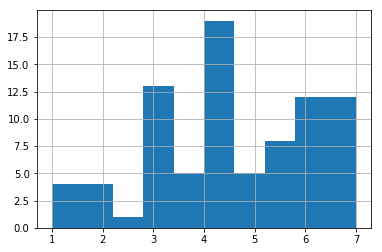

In [72]:
participants_entry_survey_data_clean.TIPI_extraversion.hist()

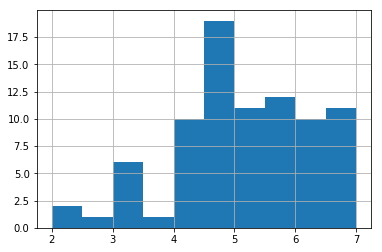

In [73]:
participants_entry_survey_data_clean.TIPI_agreeableness.hist()

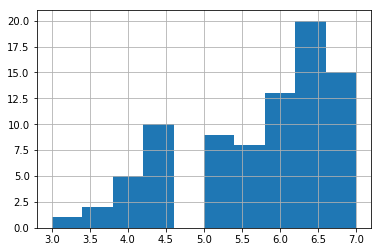

In [74]:
participants_entry_survey_data_clean.TIPI_openness.hist()

# Store

In [75]:
participants_entry_survey_data_clean.set_index('member', inplace=True)

In [76]:
with pd.HDFStore(surveys_clean_store_path) as store:
    store.put('entry/participants_entry_survey_data_clean', participants_entry_survey_data_clean, format='table')


# Sainty check

In [77]:
members = pd.read_hdf(analysis_store_path, 'metadata/members')
members.head()

,company,member_id,participates,RecipientID,start_date_ts,end_date_ts
member,,,,,,
1BFLH7NZGE,Company B,535,1,MLRP_0vcgVNdOY7vpB7D,2018-06-12 00:00:00-04:00,2018-08-15 23:59:59-04:00
WLA510JNBN,Company B,537,1,MLRP_74oJw6drZeVi02V,2018-06-19 00:00:00-04:00,2018-08-15 23:59:59-04:00
76B60URM93,Company B,730,1,MLRP_8Cx2w4pmTcBCFUx,2018-06-18 00:00:00-04:00,2018-07-15 23:59:59-04:00
P95P5A6IP2,Company B,536,1,MLRP_5j3Rlvkq0RYG7s1,2018-06-13 00:00:00-04:00,2018-08-15 23:59:59-04:00
MKC03RM7T5,Company N,541,1,MLRP_38gd2aldS3XcP89,2018-06-12 00:00:00-04:00,2018-07-15 23:59:59-04:00


In [78]:
a = participants_entry_survey_data_clean.join(members)

In [79]:
a.query('is_ceo == 1')[['company']].sort_values('company')

,company
member,
RCDMRUYLXV,Company A
1BFLH7NZGE,Company B
BJDUVA71EG,Company C
JQQL28GOU8,Company D
29307MUU73,Company E
3ZH34TXI1T,Company F
V5PTY0NHS2,Company G
PT59TRESGV,Company H
NSBU2JEYQB,Company I
